# NumPy

NumPy (Numerical Python): 科学や数学のための数値計算ライブラリ

In [1]:
# NumPyのインポートの仕方
import numpy as np

## NumPy Arrays (ndarray)

In [2]:
# こんな感じでベクトルを作る
vector = np.array([1, 2, 3])
print(vector)
# こんな感じで行列を作る
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
# (後述するが，indexingにより要素を取ってこれる)
matrix[0][0]

1

In [4]:
# データタイプをみると，NumPyのデータタイプ (dtype)
# 各要素にはdtypeオブジェクトが入っている
type(matrix[0][0])

numpy.int64

In [5]:
# 要素のデータタイプを指定することも可能
array = np.array([1, 2, 3], dtype=complex)
print(array)
print(type(array[0]))

[1.+0.j 2.+0.j 3.+0.j]
<class 'numpy.complex128'>


## dtype

In [6]:
# NumPyは多くのdtypeが用意されているが，よく使うのは
# np.unit8 (u: unsigned つまり0~255) 普通の画像データはこれ
ndarray = np.array([1, 2, 3], dtype=np.uint8)
print(type(ndarray[0]))
# np.float32　機械学習に使うデータを保存する時によく使う
ndarray = np.array([1, 2, 3], dtype=np.float32)
print(type(ndarray[0]))
# np.float64　実際のモデル学習には64bitで学習することが多い
ndarray = np.array([1, 2, 3], dtype=np.float64)
print(type(ndarray[0]))

<class 'numpy.uint8'>
<class 'numpy.float32'>
<class 'numpy.float64'>


In [7]:
# .astype()で元のndarrayのdtypeを変更
ndarray.astype(np.uint8)

array([1, 2, 3], dtype=uint8)

## 演算

In [8]:
array1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [9]:
array1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
array2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
#　演算は要素毎の計算
array1 + array2
# array1 - array2
# array1 / array2
# array1 * array2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

## Broadcasting

In [12]:
# 要素の数が一致してなくても
array1 = np.array([1, 2, 3])
array2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [13]:
# ちゃんと計算できる→Broadcastingのおかげ
array1 + array2
# array1 - array2
# array1 / array2
# array1 * array2

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

## Shape

## .shape

In [14]:
ndarray = np.array([[1, 2], [3, 4], [5, 6]])
# .shapeでshapeを確認
ndarray.shape

(3, 2)

In [15]:
#(行, 列)　3行2列
print(ndarray)

[[1 2]
 [3 4]
 [5 6]]


## .reshape()

In [16]:
# reshapeでshapeを変更できる
ndarray.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
# サイズが合わないとエラーになる．3x2=6の元のarrayに対して1x3=3にreshapeはできない
ndarray.reshape(1, 3)

ValueError: cannot reshape array of size 6 into shape (1,3)

In [18]:
# 以下の２つは似てるようでshapeの結果が異なるので注意
ndarray1 = np.array([1, 2, 3])
ndarray2 = np.array([[1, 2, 3]])
print(ndarray1.shape)
print(ndarray2.shape)

(3,)
(1, 3)


## np.expand_dims(ndarray, axis)

In [19]:
# rankを１つ追加
# shape: (3,) ->(1, 3)
expand_ndarray = np.expand_dims(ndarray1, axis=0)
expand_ndarray.shape


(1, 3)

In [20]:
# axis=-1にすると最後のrankを追加
# (3,) -> (3, 1)
expand_ndarray = np.expand_dims(ndarray1, axis=-1)
expand_ndarray.shape

(3, 1)

## np.squeeze(ndarray)


In [21]:
# shapeで'1'のrankをなくす
# shape: (3, 1) -> (3,)
print(expand_ndarray.shape)
squeeze_expand_ndarray = np.squeeze(expand_ndarray)
print(squeeze_expand_ndarray.shape)

(3, 1)
(3,)


## .flatten()

In [22]:
ndarray = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
ndarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [23]:
# 一行にする
ndarray.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Indexing

In [24]:
# 一列の場合は簡単
ndarray = np.array([1, 2, 3, 4])
# indexは0から
print(ndarray[0])
# 最後は-1
print(ndarray[-1])

1
4


In [25]:
# N-dimentional
ndarray = np.array([[1, 2], [3, 4], [5, 6]])
#まずは2段階で考える
# [0]で最初の要素[1, 2]を取得
print(ndarray[0])
# それに対してさらにindexing
print(ndarray[0][1])
# ndarrayでは以下のようにまとめて記述するのが一般的
print(ndarray[0, 1]) #[一個目のindex, 二個目のindex]
#　画像の場合は(height, width, channel)の並びになるので覚えておく(後述)

[1 2]
2
2


## Slicing

In [26]:
# 一列の場合
ndarray = np.array([1, 2, 3, 4])
# [N:M] N以上M未満を返す
print(ndarray[1:3]) #[2, 3]
# Nを省略すると最初からM未満
print(ndarray[:3]) #[1, 2, 3]
# Mを省略するとNから最後の要素まで
print(ndarray[1:]) #[2, 3, 4]
# 最後の要素はindex=-1なのでこのようにすれば'最後から〇〇番目の要素まで'
print(ndarray[:-2]) #[1, 2]
# もしくは'後ろ〇番目の要素から'
print(ndarray[-2:]) #[3, 4]
# ':'のみだと，全ての要素を取得
print(ndarray[:]) # [1, 2, 3, 4]

[2 3]
[1 2 3]
[2 3 4]
[1 2]
[3 4]
[1 2 3 4]


In [27]:
# N-dimentionalの場合
array = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
array

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [28]:
#　[行, 列]
#　まずは１つ目
array[:2]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [29]:
# からの２つ目
array[:2, 1:]

array([[2, 3, 4],
       [6, 7, 8]])

In [30]:
# これとは同じにならないことに注意
array[:2][1:]

array([[5, 6, 7, 8]])

In [31]:
# 列だけ抽出することも可能
array[:, 2]

array([ 3,  7, 11, 15])

## np.arange(start=0, stop, step=1)

In [32]:
# [start, start+step, start+2*step, ..., stop未満]
# stopとstepは省略可能．その場合start=0, step=1が入る
np.arange(5) # np.arange(0, 5, 1)と同じ

array([0, 1, 2, 3, 4])

In [33]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [34]:
# stepを負の数にすれば降順も可能
np.arange(10, 1, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

## np.linspace(start, stop, num=50)

In [35]:
# start以上stop以下の数をnum個で区切った値のリスト(linear)
# stopを含むので注意
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

## np.logspace(start, stop, num=50)

In [36]:
# 10**start以上10**stop以下の数をnum個で区切った数のリスト(logarithm)
np.logspace(0, 3, 10)

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

In [37]:
np.linspace(1, 1000, 10)# linearとの比較

array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
       1000.])

## np.zeros(shape)

In [38]:
# 要素が全て０のndarrayを作成
shape = (3, 3)
np.zeros(shape)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
# tupleではなくintをいれると，一列のarrayができる
np.zeros(3)

array([0., 0., 0.])

## np.ones(shape)

In [40]:
# np.zerosの「1」版　要素が全て１のndarrayを作成
shape = (3, 3)
np.ones(shape)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [41]:
np.ones(3)

array([1., 1., 1.])

## np.eye(N)

In [42]:
# N x Nの単位行列を作成
#単位行列：対角成分が全て１の正方行列
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
# N行M列の行列も作れる
np.eye(3, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

## np.randomを使って乱数生成

### np.random.rand()

In [44]:
# 単純に乱数生成
np.random.rand()

0.5861121281146473

In [45]:
# 毎回違う値が生成される
np.random.rand()

0.8751994062339193

In [46]:
# 引数を入れるとndarrayを返す
np.random.rand(3, 2)

array([[0.841998  , 0.48121293],
       [0.63081058, 0.7971742 ],
       [0.78018551, 0.66915064]])

### np.random.seed()

In [47]:
# seedを指定すると，毎回同じ乱数を生成してくれる
np.random.seed(1)
np.random.rand()

0.417022004702574

In [48]:
np.random.seed(1)
np.random.rand()

0.417022004702574

In [49]:
# Jupyterのcellがわかるとリセットされるので注意
np.random.rand()

0.7203244934421581

### np.random.randn()

In [50]:
# 標準正規分布(平均0, 分散1)からランダムの値が返される
np.random.randn(3, 3)

array([[-0.52817175, -1.07296862,  0.86540763],
       [-2.3015387 ,  1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038,  1.46210794]])

In [51]:
# 任意の正規分布を使いたい場合はnp.random.normalを使う
mu = 0
sigma = 1
np.random.normal(mu, sigma)

-2.060140709497654

### np.random.randint(low, high=None, size=None)

In [52]:
# low以上high未満のランダムな整数でsizeのndarrayを生成
size = (2, 3)
np.random.randint(10, 100, size=size)

array([[96, 23, 19],
       [17, 73, 71]])

In [53]:
# high=Noneの場合は0以上low未満
np.random.randint(10)

6

### np.random.choice()

In [54]:
index_pool = np.arange(0, 10, 2)
index_pool

array([0, 2, 4, 6, 8])

In [55]:
# 指定したndarrayからランダムで値を取ってくる
np.random.choice(index_pool)

2

## 統計量を求める

In [56]:
# 標準正規分布から乱数生成
std_norm = np.random.randn(5, 5)
std_norm

array([[-0.17242821, -0.87785842,  0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434,  0.90085595, -0.68372786],
       [-0.12289023, -0.93576943, -0.26788808,  0.53035547, -0.69166075],
       [-0.39675353, -0.6871727 , -0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218,  0.74204416, -0.19183555]])

In [57]:
#最大値を取得
std_norm.max()

1.6598021771098705

In [58]:
#最大値のindexを取得
std_norm.argmax()

22

In [59]:
#最小値を取得
std_norm.min()

-1.1173103486352778

In [60]:
#最小値のindexを取得
std_norm.argmin()

20

In [61]:
#平均
std_norm.mean()

-0.06134877883769695

In [62]:
#中央値
np.median(std_norm)

-0.17242820755043575

In [63]:
# medianはmeanよりも時間がかかる
# timeモジュールを使って処理時間を計測する
import time
big = np.random.randint(10, 100, (1000, 10000))
before = time.time()
np.median(big)
after_median = time.time()
print('median took {:.2f} sec'.format(after_median - before))
np.mean(big)
after_mean = time.time()
print('mean took {:.2f} sec'.format(after_mean - after_median))

median took 0.17 sec
mean took 0.01 sec


In [64]:
#標準偏差 (standard deviation)
std_norm.std()

0.750373507574642

In [65]:
# axis引数で特定のaxisにて統計量を計算(axis=0: 列, axis=1: 行)
print(std_norm)
print('max value on axis=0: {}'.format(std_norm.max(axis=0)))
print('max value on axis=1: {}'.format(std_norm.max(axis=1)))

[[-0.17242821 -0.87785842  0.04221375  0.58281521 -1.10061918]
 [ 1.14472371  0.90159072  0.50249434  0.90085595 -0.68372786]
 [-0.12289023 -0.93576943 -0.26788808  0.53035547 -0.69166075]
 [-0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555]]
max value on axis=0: [ 1.14472371  0.90159072  1.65980218  0.90085595 -0.0126646 ]
max value on axis=1: [ 0.58281521  1.14472371  0.53035547 -0.0126646   1.65980218]


## 数学で使う便利関数

### np.sqrt()

In [66]:
# 平方根 (square root)
np.sqrt([1, 2, 3, 4])

array([1.        , 1.41421356, 1.73205081, 2.        ])

### np.log(ndarray)

In [67]:
ndarray = np.linspace(1, 10, 10)
print(ndarray)
# Log関数 (logarithm)
# 底はe(ネイピア数)
logndarray = np.log(ndarray)
print(logndarray)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]


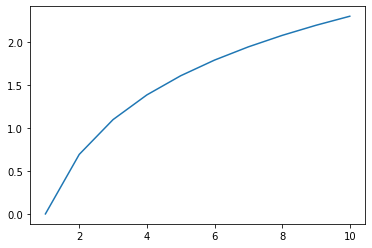

In [68]:
#グラフ描画用ライブラリのimport
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ndarray, logndarray)

### np.exp(ndarray)

In [69]:
# 指数関数(Exponential function)
# 底はe(ネイピア数)
expndarray = np.exp(ndarray)
print(expndarray)

[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]


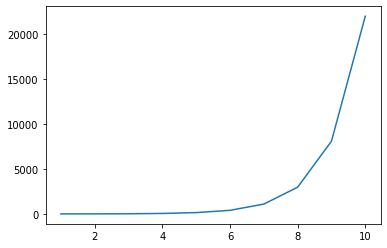

In [70]:
plt.plot(ndarray, expndarray)

### np.e

In [71]:
#ネイピア数
np.e

2.718281828459045

### np.sum()

In [72]:
array = np.arange(1, 11)
print(array)

[ 1  2  3  4  5  6  7  8  9 10]


In [73]:
# 要素の総和 (summation)
np.sum(array)

55

In [74]:
array = array.reshape(2, 5)
array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [75]:
#axis引数で行，列別に計算できる
np.sum(array, axis=0)

array([ 7,  9, 11, 13, 15])

In [76]:
np.sum(array, axis=1)

array([15, 40])

### np.abs()

In [77]:
array = np.arange(-10, 0)
array

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [78]:
#　絶対値 (absolute value)
np.abs(array)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

## np.nanとnp.isnan()

In [79]:
# 負の値のlogをとると"nan"が返る
neg_val = -10
np.log(neg_val)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [80]:
# 'nan'はnp.nan (*Noneとは別もの)
np.nan

nan

In [81]:
# タイプはfloatなので，floatについてのエラメッセージがでたらnp.nanを疑う
type(np.nan)

float

In [82]:
# nanチェックにはnp.isnan()を使う
nan_val = np.log(neg_val)
np.isnan(nan_val)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


True

In [83]:
# is np.nan　や ==np.nanではダメ
print(nan_val is np.nan)
print(nan_val == np.nan)

False
False


## その他便利関数

### np.clip(a, a_min, a_max)

In [84]:
array = np.arange(0, 10)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
# 最小値と最大値を設定する．その範囲以外の数字は最小値，もしくは最大値を適用
np.clip(array, 3, 7)

array([3, 3, 3, 3, 4, 5, 6, 7, 7, 7])

### np.where()

In [86]:
array = np.arange(10)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
# 条件に一致する要素を入れ替える (この場合Trueは1, Falseは0)
np.where(array > 3, 1, 0)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [88]:
# conditionのみ指定すると，その条件に一致するインデックスのみが残る
np.where(array > 3)

(array([4, 5, 6, 7, 8, 9]),)

In [89]:
# filter
array > 3

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [90]:
array[array > 3]

array([4, 5, 6, 7, 8, 9])

In [91]:
# ndarrayでも，flatになってかえってくるので注意
ndarray = array.reshape(2, 5)
print(ndarray.shape)
ndarray[ndarray > 3]

(2, 5)


array([4, 5, 6, 7, 8, 9])

In [92]:
(ndarray > 3)

array([[False, False, False, False,  True],
       [ True,  True,  True,  True,  True]])

In [93]:
# 全て？
(ndarray > 3).all()

False

In [94]:
# １つでも？
(ndarray > 3).any()

True

In [95]:
# axis=0: 列ごとに評価, axis=1: 行ごとに評価
(ndarray > 3).all(axis=0)

array([False, False, False, False,  True])

### np.unique()

In [96]:
array = np.array([1, 1, 2, 3, 4, 2, 3, 4, 5])
# 重複を除く
np.unique(array)

array([1, 2, 3, 4, 5])

In [97]:
# return_counts=Trueで，各要素のカウントを返す
np.unique(array, return_counts=True)

(array([1, 2, 3, 4, 5]), array([2, 2, 2, 2, 1]))

### np.bincount()

In [98]:
#0, 1, 2, 3...の各カウント数を返す
np.bincount(array)

array([0, 2, 2, 2, 2, 1])

### np.concatenate()とnp.stack()

In [99]:
ndarray_even = np.arange(0, 18, 2).reshape(3, 3)
ndarray_even

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [100]:
ndarray_odd = np.arange(1, 19, 2).reshape(3, 3)
ndarray_odd

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [101]:
# concatenate: arrayを連結する
np.concatenate([ndarray_even, ndarray_odd])

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [102]:
# 既存のaxisを指定して特定の軸で連結する．デフォルトは0
np.concatenate([ndarray_even, ndarray_odd], axis=1)

array([[ 0,  2,  4,  1,  3,  5],
       [ 6,  8, 10,  7,  9, 11],
       [12, 14, 16, 13, 15, 17]])

In [103]:
# concatenateと異なり，新たなaxisを作成　（デフォルトaxis=0）
stacked_array = np.stack([ndarray_even, ndarray_odd])
stacked_array
print('stacked_array shape: {}'.format(stacked_array.shape))

stacked_array shape: (2, 3, 3)


## np.transposeと.T

In [104]:
ndarray = np.random.randn(3, 4)
print(ndarray.shape)
ndarray

(3, 4)


array([[-0.88762896, -0.60859763,  0.58678053,  0.49679192],
       [-0.38077438, -0.08352347,  1.1694651 ,  2.02470207],
       [ 0.74651419,  0.08956961,  0.7360994 , -0.88584097]])

In [105]:
# 転置 (transpose)
transpose_ndarray = np.transpose(ndarray)
transpose_ndarray

array([[-0.88762896, -0.38077438,  0.74651419],
       [-0.60859763, -0.08352347,  0.08956961],
       [ 0.58678053,  1.1694651 ,  0.7360994 ],
       [ 0.49679192,  2.02470207, -0.88584097]])

In [106]:
transpose_ndarray.shape

(4, 3)

In [107]:
# .Tが便利
ndarray.T

array([[-0.88762896, -0.38077438,  0.74651419],
       [-0.60859763, -0.08352347,  0.08956961],
       [ 0.58678053,  1.1694651 ,  0.7360994 ],
       [ 0.49679192,  2.02470207, -0.88584097]])

In [108]:
# n-dimentionalでも同じ
ndarray = np.random.randn(3, 4, 5)

In [109]:
np.transpose(ndarray).shape

(5, 4, 3)

## np.save('path', array)とnp.load('path')

In [110]:
# numpyオブジェクトをsaveする
file_path = 'sample_ndarray.npy' #拡張子はつけなくても自動で.npyで保存される
np.save(file_path, ndarray)

In [111]:
# numpyオブジェクトをloadする
loaded_ndarray = np.load(file_path)

In [112]:
loaded_ndarray.shape

(3, 4, 5)

In [113]:
# dictionaryを.npyとして保存する
dictionary = {
    'id': 123456,
    'image': np.array([1, 2, 3])
}
file_path = 'sample_dict.npy'
np.save(file_path, dictionary)

In [114]:
# dictionaryはpickleで保存されているのでallow_pickle=Trueを指定してload
loaded_dict = np.load(file_path, allow_pickle=True)

In [115]:
# arrayの状態で保存されているので，
loaded_dict

array({'id': 123456, 'image': array([1, 2, 3])}, dtype=object)

In [116]:
# dictionaryを取り出す場合は'[()]'を使う
loaded_dict[()]

{'id': 123456, 'image': array([1, 2, 3])}